# **LAYOUT ANALYSIS OF PALM LEAF IMAGES**

####**Boyina Kamal(BL.EN.U4CSE20025)**
####**Dutta Swetchana(BL.EN.U4CSE20039)**
####**Gujja Manaswi Reddy(BL.EN.U4CSE20052)**
####**Karru Sushrutha(BL.EN.U4CSE20070)**

# **LOADING IMAGES**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os
import numpy as np
import cv2
import tensorflow as tf
from tensorflow import keras

# Path to the folders containing images and masks
image_folder = "/content/drive/MyDrive/layoutanalysis/image"
mask_folder = "/content/drive/MyDrive/layoutanalysis/label"

# Get the list of image and mask filenames
image_filenames = sorted(os.listdir(image_folder))
mask_filenames = sorted(os.listdir(mask_folder))

# Data normalization function
def normalize_data(data):
    return data / 255.0

# Initialize empty lists to store normalized images and masks
normalized_images = []
normalized_masks = []

# Iterate over the image and mask filenames
for i in range(len(image_filenames)):
    # Load image and mask
    image_filename = os.path.join(image_folder, image_filenames[i])
    mask_filename = os.path.join(mask_folder, mask_filenames[i])
    image = cv2.imread(image_filename)
    mask = cv2.imread(mask_filename)
    new_size = (384, 96)
    image_resized = cv2.resize(image, new_size)
    mask_resized = cv2.resize(mask, new_size)
    # Normalize image and mask
    normalized_image = normalize_data(image_resized)
    normalized_mask = normalize_data(mask_resized)
    print("img",normalized_image.shape)
    print("mask",normalized_mask.shape)

    # Append normalized images and masks to the respective lists
    normalized_images.append(normalized_image)
    normalized_masks.append(normalized_mask)

# Convert the image and mask lists to numpy arrays
normalized_images = np.array(normalized_images)
normalized_masks = np.array(normalized_masks)

img (96, 384, 3)
mask (96, 384, 3)
img (96, 384, 3)
mask (96, 384, 3)
img (96, 384, 3)
mask (96, 384, 3)
img (96, 384, 3)
mask (96, 384, 3)
img (96, 384, 3)
mask (96, 384, 3)
img (96, 384, 3)
mask (96, 384, 3)
img (96, 384, 3)
mask (96, 384, 3)
img (96, 384, 3)
mask (96, 384, 3)
img (96, 384, 3)
mask (96, 384, 3)
img (96, 384, 3)
mask (96, 384, 3)
img (96, 384, 3)
mask (96, 384, 3)
img (96, 384, 3)
mask (96, 384, 3)
img (96, 384, 3)
mask (96, 384, 3)
img (96, 384, 3)
mask (96, 384, 3)
img (96, 384, 3)
mask (96, 384, 3)
img (96, 384, 3)
mask (96, 384, 3)
img (96, 384, 3)
mask (96, 384, 3)
img (96, 384, 3)
mask (96, 384, 3)
img (96, 384, 3)
mask (96, 384, 3)
img (96, 384, 3)
mask (96, 384, 3)
img (96, 384, 3)
mask (96, 384, 3)
img (96, 384, 3)
mask (96, 384, 3)
img (96, 384, 3)
mask (96, 384, 3)
img (96, 384, 3)
mask (96, 384, 3)
img (96, 384, 3)
mask (96, 384, 3)
img (96, 384, 3)
mask (96, 384, 3)
img (96, 384, 3)
mask (96, 384, 3)
img (96, 384, 3)
mask (96, 384, 3)
img (96, 384, 3)
mas

In [ ]:
split_ratio = 0.8
split_index = int(len(normalized_images) * split_ratio)
train_images = normalized_images[:split_index]
train_masks = normalized_masks[:split_index]
test_images = normalized_images[split_index:]
test_masks = normalized_masks[split_index:]

In [ ]:
train_labels = np.argmax(train_masks, axis=-1)
test_labels = np.argmax(test_masks, axis=-1)

In [ ]:
print(normalized_images.shape)
print(normalized_masks.shape)

(224, 96, 384, 3)
(224, 96, 384, 3)


In [ ]:
print(normalized_masks.shape)

(224, 96, 384, 3)


#**1. FCN-32**

In [ ]:

# Define the FCN model
model = keras.Sequential([
    # Encoder layers
    keras.layers.Conv2D(64, 3, activation='relu', padding='same', input_shape=(96, 384, 3)),
    keras.layers.Conv2D(64, 3, activation='relu', padding='same'),
    keras.layers.MaxPooling2D(),

    keras.layers.Conv2D(128, 3, activation='relu', padding='same'),
    keras.layers.Conv2D(128, 3, activation='relu', padding='same'),
    keras.layers.MaxPooling2D(),

    keras.layers.Conv2D(256, 3, activation='relu', padding='same'),
    keras.layers.Conv2D(256, 3, activation='relu', padding='same'),
    keras.layers.Conv2D(256, 3, activation='relu', padding='same'),
    keras.layers.MaxPooling2D(),

    keras.layers.Conv2D(512, 3, activation='relu', padding='same'),
    keras.layers.Conv2D(512, 3, activation='relu', padding='same'),
    keras.layers.Conv2D(512, 3, activation='relu', padding='same'),
    keras.layers.MaxPooling2D(),

    keras.layers.Conv2D(512, 3, activation='relu', padding='same'),
    keras.layers.Conv2D(512, 3, activation='relu', padding='same'),
    keras.layers.Conv2D(512, 3, activation='relu', padding='same'),
    keras.layers.MaxPooling2D(),

    keras.layers.Conv2DTranspose(512, 3, strides=2, activation='relu', padding='same'),
    keras.layers.Conv2D(512, 3, activation='relu', padding='same'),
    keras.layers.Conv2D(512, 3, activation='relu', padding='same'),
    keras.layers.Conv2D(512, 3, activation='relu', padding='same'),
    keras.layers.Conv2DTranspose(512, 3, strides=2, activation='relu', padding='same'),
    keras.layers.Conv2D(512, 3, activation='relu', padding='same'),
    keras.layers.Conv2D(512, 3, activation='relu', padding='same'),
    keras.layers.Conv2D(512, 3, activation='relu', padding='same'),
    keras.layers.Conv2DTranspose(256, 3, strides=2, activation='relu', padding='same'),
    keras.layers.Conv2D(256, 3, activation='relu', padding='same'),
    keras.layers.Conv2D(256, 3, activation='relu', padding='same'),
    keras.layers.Conv2D(256, 3, activation='relu', padding='same'),
    keras.layers.Conv2DTranspose(128, 3, strides=2, activation='relu', padding='same'),
    keras.layers.Conv2D(128, 3, activation='relu', padding='same'),
    keras.layers.Conv2D(128, 3, activation='relu', padding='same'),
    keras.layers.Conv2DTranspose(64, 3, strides=2, activation='relu', padding='same'),
    keras.layers.Conv2D(64, 3, activation='relu', padding='same'),
    keras.layers.Conv2D(3, 3, activation='sigmoid', padding='same')
])

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


# Train the model
model.fit(train_images, train_labels, epochs=20, batch_size=8)
loss, accuracy = model.evaluate(test_images, test_labels)


# Evaluate the model

print("Test Loss:", loss)
print("Test Accuracy:", accuracy)

Epoch 1/20
23/23 [==============================] - 690s 29s/step - loss: 1.0859 - accuracy: 0.4775
Epoch 2/20
23/23 [==============================] - 654s 28s/step - loss: 0.9056 - accuracy: 0.4175
Epoch 3/20
23/23 [==============================] - 660s 29s/step - loss: 0.8270 - accuracy: 0.5748
Epoch 4/20
23/23 [==============================] - 660s 29s/step - loss: 0.7448 - accuracy: 0.6663
Epoch 5/20
23/23 [==============================] - 663s 29s/step - loss: 0.6919 - accuracy: 0.7171
Epoch 6/20
23/23 [==============================] - 657s 29s/step - loss: 0.7323 - accuracy: 0.7547
Epoch 7/20
23/23 [==============================] - 659s 29s/step - loss: 0.7370 - accuracy: 0.6753
Epoch 8/20
23/23 [==============================] - 656s 28s/step - loss: 0.6014 - accuracy: 0.7656
Epoch 9/20
23/23 [==============================] - 652s 28s/step - loss: 0.5508 - accuracy: 0.7740
Epoch 10/20
23/23 [==============================] - 652s 28s/step - loss: 0.4578 - accuracy: 0.8306

In [ ]:
model.save("/content/drive/MyDrive/NNDL_models_5/FCN_32_o.h5")

1/1 [==============================] - 1s 724ms/step


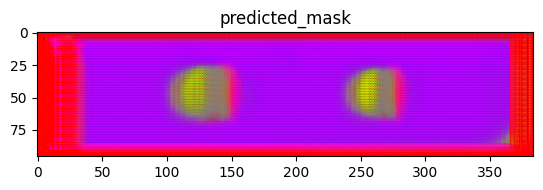

In [ ]:
import os
import cv2
import numpy as np
import tensorflow as tf
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt

def normalize_data(data):
    return data / 255.0

# Path to the image file
#image_file = "D:\AMRITA\ML pjct\palm_mask\image\MaI14_337.jpg.png"
image_file = "/content/MaI14_057.jpg"
model_path = "/content/drive/MyDrive/NNDL_models_5/FCN_32_20.h5"

model = tf.keras.models.load_model(model_path)

# Read the image
image = cv2.imread(image_file)
new_size = (384, 96)
image_resized = cv2.resize(image, new_size)
    #mask_resized = cv2.resize(mask, new_size)
# Normalize the image
normalized_image = normalize_data(image_resized)

# Convert the image to numpy array
normalized_image = np.array([normalized_image])

# Create a TensorFlow tensor from the normalized image
image_tensor = tf.convert_to_tensor(normalized_image)

# Perform prediction using the trained model
predicted_mask = model.predict(image_tensor)

# Perform any post-processing or analysis based on the predicted mask
# ...

# Display the layout segmentation mask
plt.title("predicted_mask")
plt.imshow(predicted_mask[0])
plt.show

tf.keras.preprocessing.image.save_img(f'predicted_fcn32.png', predicted_mask[0])

1/1 [==============================] - 1s 580ms/step


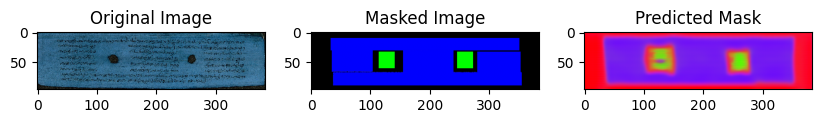

In [ ]:
import matplotlib.pyplot as plt


# Load the original image
original_image = test_images[0]

# Create a masked version of the original image
masked_image = test_masks[0]

# Create a predicted mask for the original image
image=test_images[0]
new_size = (384, 96)
image_resized = cv2.resize(image, new_size)
normalized_image = np.array([image_resized])
image_tensor = tf.convert_to_tensor(normalized_image)
predicted_mask = model.predict(image_tensor)

# Display the original image, masked image and predicted mask
plt.figure(figsize=(10, 40))
plt.subplot(1, 3, 1)
plt.imshow(original_image)
plt.title("Original Image")

plt.subplot(1, 3, 2)
plt.imshow(masked_image)
plt.title("Masked Image")

plt.subplot(1, 3, 3)
plt.imshow(predicted_mask[0])
plt.title("Predicted Mask")

plt.show()



In [ ]:
import numpy as np
from sklearn.metrics import precision_recall_curve, average_precision_score

model_path = "/content/drive/MyDrive/NNDL_models_5/FCN_32_20.h5"
model = tf.keras.models.load_model(model_path)
predicted_masks = model.predict(test_images)


threshold = 0.5
binary_masks = (predicted_masks > threshold).astype(int)
binary_true_masks = (test_masks > threshold).astype(int)  # Convert ground truth masks as well


def compute_iou(y_true, y_pred):
    intersection = np.sum(y_true * y_pred)
    union = np.sum(np.clip(y_true + y_pred, 0, 1))
    iou = intersection / (union + 1e-7)  # Add a small value to avoid division by zero
    return iou

iou_scores = []
for i in range(len(test_images)):
    iou = compute_iou(binary_true_masks[i], binary_masks[i])
    iou_scores.append(iou)


ap_scores = []
for class_id in range(3):  # Assuming you have 3 classes
    y_true = binary_true_masks[..., class_id].flatten()
    y_pred = binary_masks[..., class_id].flatten()


    if np.sum(y_true) == 0:
        continue

    precision, recall, _ = precision_recall_curve(y_true, y_pred)
    ap = average_precision_score(y_true, y_pred)
    ap_scores.append(ap)


mAP = np.mean(ap_scores)
print("mAP@IoU:",mAP)

2/2 [==============================] - 31s 9s/step
mAP@IoU: 0.5643174690805237


In [ ]:
import numpy as np
from sklearn.metrics import classification_report

# Assuming you have the test data: test_images and test_labels

# Predict the labels for the test images
predicted_labels = model.predict(test_images)

# Convert the predicted probabilities to class labels
predicted_labels = np.argmax(predicted_labels, axis=-1)

# Flatten the ground truth and predicted labels
test_labels_flat = test_labels.flatten()
predicted_labels_flat = predicted_labels.flatten()

# Calculate evaluation metrics
classification_report = classification_report(test_labels_flat, predicted_labels_flat)

print("Classification Report:\n", classification_report)

2/2 [==============================] - 36s 14s/step
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.93      0.90    652627
           1       0.83      0.60      0.70     66927
           2       0.95      0.93      0.94    939326

    accuracy                           0.92   1658880
   macro avg       0.89      0.82      0.85   1658880
weighted avg       0.92      0.92      0.92   1658880



# **2. FCN-16 without skip**

In [ ]:

# Define the FCN model
model = keras.Sequential([
    # Encoder layers
    keras.layers.Conv2D(64, 3, activation='relu', padding='same', input_shape=(96, 384, 3)),
    keras.layers.Conv2D(64, 3, activation='relu', padding='same'),
    keras.layers.MaxPooling2D(),

    keras.layers.Conv2D(128, 3, activation='relu', padding='same'),
    keras.layers.Conv2D(128, 3, activation='relu', padding='same'),
    keras.layers.MaxPooling2D(),

    keras.layers.Conv2D(256, 3, activation='relu', padding='same'),
    keras.layers.Conv2D(256, 3, activation='relu', padding='same'),
    keras.layers.Conv2D(256, 3, activation='relu', padding='same'),
    keras.layers.MaxPooling2D(),

    keras.layers.Conv2D(512, 3, activation='relu', padding='same'),
    keras.layers.Conv2D(512, 3, activation='relu', padding='same'),
    keras.layers.Conv2D(512, 3, activation='relu', padding='same'),
    keras.layers.MaxPooling2D(),

    keras.layers.Conv2DTranspose(512, 3, strides=2, activation='relu', padding='same'),
    keras.layers.Conv2D(512, 3, activation='relu', padding='same'),
    keras.layers.Conv2D(512, 3, activation='relu', padding='same'),
    keras.layers.Conv2D(512, 3, activation='relu', padding='same'),
    keras.layers.Conv2DTranspose(256, 3, strides=2, activation='relu', padding='same'),
    keras.layers.Conv2D(256, 3, activation='relu', padding='same'),
    keras.layers.Conv2D(256, 3, activation='relu', padding='same'),
    keras.layers.Conv2D(256, 3, activation='relu', padding='same'),
    keras.layers.Conv2DTranspose(128, 3, strides=2, activation='relu', padding='same'),
    keras.layers.Conv2D(128, 3, activation='relu', padding='same'),
    keras.layers.Conv2D(128, 3, activation='relu', padding='same'),
    keras.layers.Conv2DTranspose(64, 3, strides=2, activation='relu', padding='same'),
    keras.layers.Conv2D(64, 3, activation='relu', padding='same'),
    keras.layers.Conv2D(3, 3, activation='sigmoid', padding='same')
])

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


# Train the model
model.fit(train_images, train_labels, epochs=20, batch_size=8)
loss, accuracy = model.evaluate(test_images, test_labels)


# Evaluate the model

print("Test Loss:", loss)
print("Test Accuracy:", accuracy)

Epoch 1/20
23/23 [==============================] - 613s 26s/step - loss: 1.2660 - accuracy: 0.4466
Epoch 2/20
23/23 [==============================] - 609s 26s/step - loss: 0.9377 - accuracy: 0.4162
Epoch 3/20
23/23 [==============================] - 613s 27s/step - loss: 0.8156 - accuracy: 0.5825
Epoch 4/20
23/23 [==============================] - 609s 26s/step - loss: 0.8316 - accuracy: 0.5905
Epoch 5/20
23/23 [==============================] - 606s 26s/step - loss: 0.7422 - accuracy: 0.6753
Epoch 6/20
23/23 [==============================] - 605s 26s/step - loss: 0.7623 - accuracy: 0.6533
Epoch 7/20
23/23 [==============================] - 609s 26s/step - loss: 0.7383 - accuracy: 0.6815
Epoch 8/20
23/23 [==============================] - 607s 26s/step - loss: 0.8023 - accuracy: 0.5291
Epoch 9/20
23/23 [==============================] - 609s 26s/step - loss: 0.6325 - accuracy: 0.7584
Epoch 10/20
23/23 [==============================] - 610s 26s/step - loss: 0.6361 - accuracy: 0.7706

In [ ]:
model.save_weights('/content/drive/MyDrive/NNDL_models/FCN_16_weights.h5')
model.save('/content/drive/MyDrive/NNDL_models/FCN_16.h5')

1/1 [==============================] - 2s 2s/step


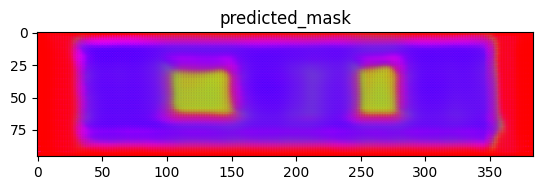

In [ ]:
import os
import cv2
import numpy as np
import tensorflow as tf
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt

def normalize_data(data):
    return data / 255.0

# Path to the image file
#image_file = "D:\AMRITA\ML pjct\palm_mask\image\MaI14_337.jpg.png"
image_file = "/content/MaI14_057.jpg"
model_path = "/content/drive/MyDrive/NNDL_models_5/FCN_16.h5"

model = tf.keras.models.load_model(model_path)

# Read the image
image = cv2.imread(image_file)
new_size = (384, 96)
image_resized = cv2.resize(image, new_size)
    #mask_resized = cv2.resize(mask, new_size)
# Normalize the image
normalized_image = normalize_data(image_resized)

# Convert the image to numpy array
normalized_image = np.array([normalized_image])

# Create a TensorFlow tensor from the normalized image
image_tensor = tf.convert_to_tensor(normalized_image)

# Perform prediction using the trained model
predicted_mask = model.predict(image_tensor)

# Perform any post-processing or analysis based on the predicted mask
# ...

# Display the layout segmentation mask
plt.title("predicted_mask")
plt.imshow(predicted_mask[0])
plt.show

tf.keras.preprocessing.image.save_img(f'predicted_fcn16_without.png', predicted_mask[0])

1/1 [==============================] - 1s 804ms/step


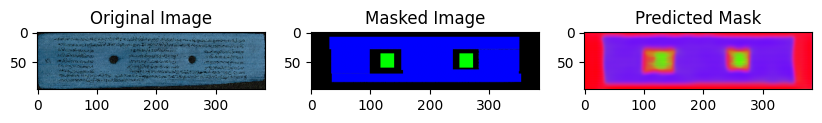

In [ ]:
import matplotlib.pyplot as plt

# Load the original image
original_image = test_images[1]

# Create a masked version of the original image
masked_image = test_masks[1]

# Create a predicted mask for the original image
image=test_images[1]
new_size = (384, 96)
image_resized = cv2.resize(image, new_size)
normalized_image = np.array([image_resized])
image_tensor = tf.convert_to_tensor(normalized_image)
predicted_mask = model.predict(image_tensor)

# Display the original image, masked image and predicted mask
plt.figure(figsize=(10, 40))
plt.subplot(1, 3, 1)
plt.imshow(original_image)
plt.title("Original Image")

plt.subplot(1, 3, 2)
plt.imshow(masked_image)
plt.title("Masked Image")

plt.subplot(1, 3, 3)
plt.imshow(predicted_mask[0])
plt.title("Predicted Mask")

plt.show()



In [ ]:
import numpy as np
from sklearn.metrics import precision_recall_curve, average_precision_score

model_path = '/content/drive/MyDrive/NNDL_models/FCN_16.h5'
model = tf.keras.models.load_model(model_path)
predicted_masks = model.predict(test_images)


threshold = 0.5
binary_masks = (predicted_masks > threshold).astype(int)
binary_true_masks = (test_masks > threshold).astype(int)  # Convert ground truth masks as well


def compute_iou(y_true, y_pred):
    intersection = np.sum(y_true * y_pred)
    union = np.sum(np.clip(y_true + y_pred, 0, 1))
    iou = intersection / (union + 1e-7)  # Add a small value to avoid division by zero
    return iou

iou_scores = []
for i in range(len(test_images)):
    iou = compute_iou(binary_true_masks[i], binary_masks[i])
    iou_scores.append(iou)


ap_scores = []
for class_id in range(3):  # Assuming you have 3 classes
    y_true = binary_true_masks[..., class_id].flatten()
    y_pred = binary_masks[..., class_id].flatten()


    if np.sum(y_true) == 0:
        continue

    precision, recall, _ = precision_recall_curve(y_true, y_pred)
    ap = average_precision_score(y_true, y_pred)
    ap_scores.append(ap)


mAP = np.mean(ap_scores)
print("mAP@IoU:",mAP)

2/2 [==============================] - 44s 13s/step
mAP@IoU: 0.6801529076390653


In [ ]:
import numpy as np
from sklearn.metrics import classification_report

# Assuming you have the test data: test_images and test_labels

# Predict the labels for the test images
predicted_labels = model.predict(test_images)

# Convert the predicted probabilities to class labels
predicted_labels = np.argmax(predicted_labels, axis=-1)

# Flatten the ground truth and predicted labels
test_labels_flat = test_labels.flatten()
predicted_labels_flat = predicted_labels.flatten()

# Calculate evaluation metrics
classification_report = classification_report(test_labels_flat, predicted_labels_flat)

print("Classification Report:\n", classification_report)

2/2 [==============================] - 43s 12s/step
Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.87      0.88    652627
           1       0.72      0.72      0.72     66927
           2       0.92      0.95      0.94    939326

    accuracy                           0.91   1658880
   macro avg       0.85      0.84      0.85   1658880
weighted avg       0.91      0.91      0.91   1658880



#**3. FCN-8 without skip**

In [ ]:
# Define the FCN model
model = keras.Sequential([
    # Encoder layers
    keras.layers.Conv2D(64, 3, activation='relu', padding='same', input_shape=(96, 384, 3)),
    keras.layers.Conv2D(64, 3, activation='relu', padding='same'),
    keras.layers.MaxPooling2D(),

    keras.layers.Conv2D(128, 3, activation='relu', padding='same'),
    keras.layers.Conv2D(128, 3, activation='relu', padding='same'),
    keras.layers.MaxPooling2D(),

    keras.layers.Conv2D(256, 3, activation='relu', padding='same'),
    keras.layers.Conv2D(256, 3, activation='relu', padding='same'),
    keras.layers.Conv2D(256, 3, activation='relu', padding='same'),
    keras.layers.MaxPooling2D(),

    keras.layers.Conv2DTranspose(256, 3, strides=2, activation='relu', padding='same'),
    keras.layers.Conv2D(256, 3, activation='relu', padding='same'),
    keras.layers.Conv2D(256, 3, activation='relu', padding='same'),
    keras.layers.Conv2D(256, 3, activation='relu', padding='same'),
    keras.layers.Conv2DTranspose(128, 3, strides=2, activation='relu', padding='same'),
    keras.layers.Conv2D(128, 3, activation='relu', padding='same'),
    keras.layers.Conv2D(128, 3, activation='relu', padding='same'),
    keras.layers.Conv2DTranspose(64, 3, strides=2, activation='relu', padding='same'),
    keras.layers.Conv2D(64, 3, activation='relu', padding='same'),
    keras.layers.Conv2D(3, 3, activation='sigmoid', padding='same')
])

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


# Train the model
model.fit(train_images, train_labels, epochs=20, batch_size=8)
loss, accuracy = model.evaluate(test_images, test_labels)


# Evaluate the model

print("Test Loss:", loss)
print("Test Accuracy:", accuracy)

Epoch 1/20
23/23 [==============================] - 511s 22s/step - loss: 0.9241 - accuracy: 0.5248
Epoch 2/20
23/23 [==============================] - 479s 21s/step - loss: 0.8582 - accuracy: 0.5392
Epoch 3/20
23/23 [==============================] - 484s 21s/step - loss: 0.8414 - accuracy: 0.4751
Epoch 4/20
23/23 [==============================] - 481s 21s/step - loss: 0.6891 - accuracy: 0.6316
Epoch 5/20
23/23 [==============================] - 485s 21s/step - loss: 0.4926 - accuracy: 0.7962
Epoch 6/20
23/23 [==============================] - 481s 21s/step - loss: 0.3335 - accuracy: 0.8805
Epoch 7/20
23/23 [==============================] - 475s 21s/step - loss: 0.2959 - accuracy: 0.8942
Epoch 8/20
23/23 [==============================] - 482s 21s/step - loss: 0.2905 - accuracy: 0.8945
Epoch 9/20
23/23 [==============================] - 479s 21s/step - loss: 0.2798 - accuracy: 0.8989
Epoch 10/20
23/23 [==============================] - 477s 21s/step - loss: 0.2751 - accuracy: 0.9009

In [ ]:
model.save_weights('/content/drive/MyDrive/NNDL_models/FCN_8_weights.h5')
model.save('/content/drive/MyDrive/NNDL_models/FCN_8.h5')

1/1 [==============================] - 1s 887ms/step


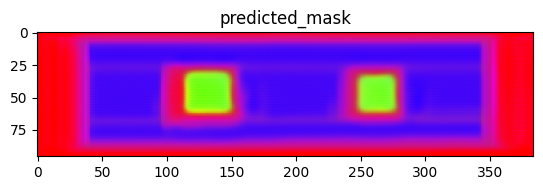

In [ ]:
import os
import cv2
import numpy as np
import tensorflow as tf
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt

def normalize_data(data):
    return data / 255.0

# Path to the image file
#image_file = "D:\AMRITA\ML pjct\palm_mask\image\MaI14_337.jpg.png"
image_file = "/content/MaI14_057.jpg"
model_path = "/content/drive/MyDrive/NNDL_models_5/FCN_8.h5"

model = tf.keras.models.load_model(model_path)

# Read the image
image = cv2.imread(image_file)
new_size = (384, 96)
image_resized = cv2.resize(image, new_size)
    #mask_resized = cv2.resize(mask, new_size)
# Normalize the image
normalized_image = normalize_data(image_resized)

# Convert the image to numpy array
normalized_image = np.array([normalized_image])

# Create a TensorFlow tensor from the normalized image
image_tensor = tf.convert_to_tensor(normalized_image)

# Perform prediction using the trained model
predicted_mask = model.predict(image_tensor)

# Perform any post-processing or analysis based on the predicted mask
# ...

# Display the layout segmentation mask
plt.title("predicted_mask")
plt.imshow(predicted_mask[0])
plt.show

tf.keras.preprocessing.image.save_img(f'predicted_fcn8_without.png', predicted_mask[0])

1/1 [==============================] - 1s 837ms/step


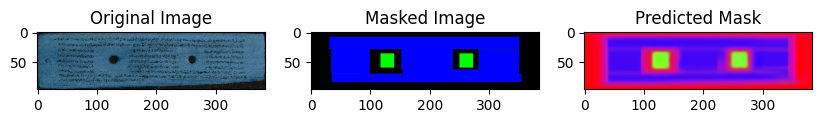

In [ ]:
import matplotlib.pyplot as plt

# Load the original image
original_image = test_images[1]

# Create a masked version of the original image
masked_image = test_masks[1]

# Create a predicted mask for the original image
image=test_images[1]
new_size = (384, 96)
image_resized = cv2.resize(image, new_size)
normalized_image = np.array([image_resized])
image_tensor = tf.convert_to_tensor(normalized_image)
predicted_mask = model.predict(image_tensor)

# Display the original image, masked image and predicted mask
plt.figure(figsize=(10, 40))
plt.subplot(1, 3, 1)
plt.imshow(original_image)
plt.title("Original Image")

plt.subplot(1, 3, 2)
plt.imshow(masked_image)
plt.title("Masked Image")

plt.subplot(1, 3, 3)
plt.imshow(predicted_mask[0])
plt.title("Predicted Mask")

plt.show()



In [ ]:
import numpy as np
from sklearn.metrics import precision_recall_curve, average_precision_score

model_path = '/content/drive/MyDrive/NNDL_models/FCN_16.h5'
model = tf.keras.models.load_model(model_path)
predicted_masks = model.predict(test_images)


threshold = 0.5
binary_masks = (predicted_masks > threshold).astype(int)
binary_true_masks = (test_masks > threshold).astype(int)  # Convert ground truth masks as well


def compute_iou(y_true, y_pred):
    intersection = np.sum(y_true * y_pred)
    union = np.sum(np.clip(y_true + y_pred, 0, 1))
    iou = intersection / (union + 1e-7)  # Add a small value to avoid division by zero
    return iou

iou_scores = []
for i in range(len(test_images)):
    iou = compute_iou(binary_true_masks[i], binary_masks[i])
    iou_scores.append(iou)


ap_scores = []
for class_id in range(3):  # Assuming you have 3 classes
    y_true = binary_true_masks[..., class_id].flatten()
    y_pred = binary_masks[..., class_id].flatten()


    if np.sum(y_true) == 0:
        continue

    precision, recall, _ = precision_recall_curve(y_true, y_pred)
    ap = average_precision_score(y_true, y_pred)
    ap_scores.append(ap)


mAP = np.mean(ap_scores)
print("mAP@IoU:",mAP)

2/2 [==============================] - 61s 14s/step
mAP@IoU: 0.6801529076390653


In [ ]:
!pip install scikit-fmm
import numpy as np
from scipy.spatial import distance
from skimage.metrics import hausdorff_distance

# Calculate the predicted masks using the model
predicted_masks = model.predict(test_images)

# Calculate the Hausdorff distances for each test sample
distances = []
for i in range(len(test_masks)):
    flattened_predicted = predicted_masks[i].flatten()
    flattened_ground_truth = test_masks[i].flatten()

    distance_predicted_to_ground_truth = hausdorff_distance(flattened_predicted, flattened_ground_truth)

    distances.append((distance_predicted_to_ground_truth))

# Calculate the mean Hausdorff distance
mean_distance=np.mean(distances)
print("Mean Hausdorff distance from predicted to ground truth:", mean_distance)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 435.1/435.1 kB 11.7 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for scikit-fmm: filename=scikit_fmm-2023.4.2-cp310-cp310-linux_x86_64.whl size=273244 sha256=21a19a95db4932349566ac73a05cd9ac7c8334682ab4269e180769898cdecd9e
  Stored in directory: /root/.cache/pip/wheels/10/d7/86/4c10506cbe5279eb370d90fa3228deff2059da5994a0d39e2b
Successfully built scikit-fmm
2/2 [==============================] - 38s 9s/step
Mean Hausdorff distance from predicted to ground truth: 11205.333333333334


In [ ]:
import numpy as np
from sklearn.metrics import classification_report

# Assuming you have the test data: test_images and test_labels

# Predict the labels for the test images
predicted_labels = model.predict(test_images)

# Convert the predicted probabilities to class labels
predicted_labels = np.argmax(predicted_labels, axis=-1)

# Flatten the ground truth and predicted labels
test_labels_flat = test_labels.flatten()
predicted_labels_flat = predicted_labels.flatten()

# Calculate evaluation metrics
classification_report = classification_report(test_labels_flat, predicted_labels_flat)

print("Classification Report:\n", classification_report)

2/2 [==============================] - 50s 14s/step
Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.87      0.88    652627
           1       0.72      0.72      0.72     66927
           2       0.92      0.95      0.94    939326

    accuracy                           0.91   1658880
   macro avg       0.85      0.84      0.85   1658880
weighted avg       0.91      0.91      0.91   1658880



#**4. FCN-16**

In [ ]:

from tensorflow import keras

# Encoder layers
inputs = keras.Input(shape=(96, 384, 3))
conv1 = keras.layers.Conv2D(64, 3, activation='relu', padding='same')(inputs)
conv1 = keras.layers.Conv2D(64, 3, activation='relu', padding='same')(conv1)
pool1 = keras.layers.MaxPooling2D()(conv1)

conv2 = keras.layers.Conv2D(128, 3, activation='relu', padding='same')(pool1)
conv2 = keras.layers.Conv2D(128, 3, activation='relu', padding='same')(conv2)
pool2 = keras.layers.MaxPooling2D()(conv2)

conv3 = keras.layers.Conv2D(256, 3, activation='relu', padding='same')(pool2)
conv3 = keras.layers.Conv2D(256, 3, activation='relu', padding='same')(conv3)
conv3 = keras.layers.Conv2D(256, 3, activation='relu', padding='same')(conv3)
pool3 = keras.layers.MaxPooling2D()(conv3)

conv4 = keras.layers.Conv2D(512, 3, activation='relu', padding='same')(pool3)
conv4 = keras.layers.Conv2D(512, 3, activation='relu', padding='same')(conv4)
conv4 = keras.layers.Conv2D(512, 3, activation='relu', padding='same')(conv4)
pool4 = keras.layers.MaxPooling2D()(conv4)

# Decoder layers
conv5 = keras.layers.Conv2DTranspose(512, 3, strides=2, activation='relu', padding='same')(pool4)
conv5 = keras.layers.Concatenate()([conv5, conv4])
conv5 = keras.layers.Conv2D(256, 3, activation='relu', padding='same')(conv5)
conv5 = keras.layers.Conv2D(256, 3, activation='relu', padding='same')(conv5)

# Skip connection for FCN-16s
conv6 = keras.layers.Conv2DTranspose(256, 3, strides=2, activation='relu', padding='same')(conv5)
conv6 = keras.layers.Concatenate()([conv6, conv3])
conv6 = keras.layers.Conv2D(128, 3, activation='relu', padding='same')(conv6)
conv6 = keras.layers.Conv2D(128, 3, activation='relu', padding='same')(conv6)

conv7 = keras.layers.Conv2DTranspose(128, 3, strides=2, activation='relu', padding='same')(conv6)
conv7 = keras.layers.Concatenate()([conv7, conv2])
conv7 = keras.layers.Conv2D(64, 3, activation='relu', padding='same')(conv7)
conv7 = keras.layers.Conv2D(64, 3, activation='relu', padding='same')(conv7)

conv8 = keras.layers.Conv2DTranspose(64, 3, strides=2, activation='relu', padding='same')(conv7)
conv8 = keras.layers.Concatenate()([conv8, conv1])
conv8 = keras.layers.Conv2D(64, 3, activation='relu', padding='same')(conv8)
conv8 = keras.layers.Conv2D(64, 3, activation='relu', padding='same')(conv8)

conv9 = keras.layers.Conv2D(3, 3, activation='sigmoid', padding='same')(conv8)

# Create the model
model = keras.Model(inputs=inputs, outputs=conv9)


# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


# Train the model
model.fit(train_images, train_labels, epochs=20, batch_size=8)
loss, accuracy = model.evaluate(test_images, test_labels)


# Evaluate the model

print("Test Loss:", loss)
print("Test Accuracy:", accuracy)

Epoch 1/20
23/23 [==============================] - 555s 24s/step - loss: 0.8428 - accuracy: 0.5600
Epoch 2/20
23/23 [==============================] - 551s 24s/step - loss: 0.8205 - accuracy: 0.5973
Epoch 3/20
23/23 [==============================] - 548s 24s/step - loss: 0.7164 - accuracy: 0.6468
Epoch 4/20
23/23 [==============================] - 544s 24s/step - loss: 0.4717 - accuracy: 0.8206
Epoch 5/20
23/23 [==============================] - 546s 24s/step - loss: 0.3486 - accuracy: 0.8795
Epoch 6/20
23/23 [==============================] - 545s 24s/step - loss: 0.2895 - accuracy: 0.8986
Epoch 7/20
23/23 [==============================] - 547s 24s/step - loss: 0.2723 - accuracy: 0.9047
Epoch 8/20
23/23 [==============================] - 554s 24s/step - loss: 0.2667 - accuracy: 0.9053
Epoch 9/20
23/23 [==============================] - 553s 24s/step - loss: 0.2523 - accuracy: 0.9105
Epoch 10/20
23/23 [==============================] - 545s 24s/step - loss: 0.2353 - accuracy: 0.9155

In [ ]:
model.save_weights('/content/drive/MyDrive/NNDL_models/FCN_16__with_skip_weights.h5')
model.save('/content/drive/MyDrive/NNDL_models/FCN_16_with_skip.h5')

1/1 [==============================] - 1s 1s/step


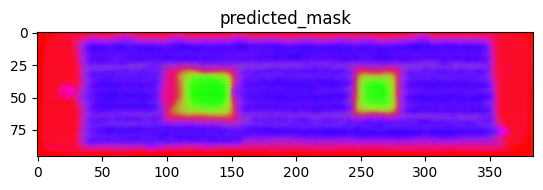

In [ ]:
import os
import cv2
import numpy as np
import tensorflow as tf
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt

def normalize_data(data):
    return data / 255.0

# Path to the image file
#image_file = "D:\AMRITA\ML pjct\palm_mask\image\MaI14_337.jpg.png"
image_file = "/content/MaI14_057.jpg"
model_path = "/content/drive/MyDrive/NNDL_models_5/FCN_16_with_skip.h5"

model = tf.keras.models.load_model(model_path)

# Read the image
image = cv2.imread(image_file)
new_size = (384, 96)
image_resized = cv2.resize(image, new_size)
    #mask_resized = cv2.resize(mask, new_size)
# Normalize the image
normalized_image = normalize_data(image_resized)

# Convert the image to numpy array
normalized_image = np.array([normalized_image])

# Create a TensorFlow tensor from the normalized image
image_tensor = tf.convert_to_tensor(normalized_image)

# Perform prediction using the trained model
predicted_mask = model.predict(image_tensor)

# Perform any post-processing or analysis based on the predicted mask
# ...

# Display the layout segmentation mask
plt.title("predicted_mask")
plt.imshow(predicted_mask[0])
plt.show

tf.keras.preprocessing.image.save_img(f'predicted_fcn16.png', predicted_mask[0])

1/1 [==============================] - 1s 1s/step


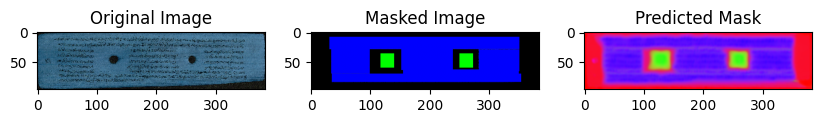

In [ ]:
import matplotlib.pyplot as plt

# Load the original image
original_image = test_images[1]

# Create a masked version of the original image
masked_image = test_masks[1]

# Create a predicted mask for the original image
image=test_images[1]
new_size = (384, 96)
image_resized = cv2.resize(image, new_size)
normalized_image = np.array([image_resized])
image_tensor = tf.convert_to_tensor(normalized_image)
predicted_mask = model.predict(image_tensor)

# Display the original image, masked image and predicted mask
plt.figure(figsize=(10, 40))
plt.subplot(1, 3, 1)
plt.imshow(original_image)
plt.title("Original Image")

plt.subplot(1, 3, 2)
plt.imshow(masked_image)
plt.title("Masked Image")

plt.subplot(1, 3, 3)
plt.imshow(predicted_mask[0])
plt.title("Predicted Mask")

plt.show()



In [ ]:
import numpy as np
from sklearn.metrics import precision_recall_curve, average_precision_score

model_path = '/content/drive/MyDrive/NNDL_models/FCN_16.h5'
model = tf.keras.models.load_model(model_path)
predicted_masks = model.predict(test_images)


threshold = 0.5
binary_masks = (predicted_masks > threshold).astype(int)
binary_true_masks = (test_masks > threshold).astype(int)  # Convert ground truth masks as well


def compute_iou(y_true, y_pred):
    intersection = np.sum(y_true * y_pred)
    union = np.sum(np.clip(y_true + y_pred, 0, 1))
    iou = intersection / (union + 1e-7)  # Add a small value to avoid division by zero
    return iou

iou_scores = []
for i in range(len(test_images)):
    iou = compute_iou(binary_true_masks[i], binary_masks[i])
    iou_scores.append(iou)


ap_scores = []
for class_id in range(3):  # Assuming you have 3 classes
    y_true = binary_true_masks[..., class_id].flatten()
    y_pred = binary_masks[..., class_id].flatten()


    if np.sum(y_true) == 0:
        continue

    precision, recall, _ = precision_recall_curve(y_true, y_pred)
    ap = average_precision_score(y_true, y_pred)
    ap_scores.append(ap)


mAP = np.mean(ap_scores)
print("mAP@IoU:",mAP)

2/2 [==============================] - 43s 12s/step
mAP@IoU: 0.6801529076390653


In [ ]:
import numpy as np
from sklearn.metrics import classification_report

# Assuming you have the test data: test_images and test_labels

# Predict the labels for the test images
predicted_labels = model.predict(test_images)

# Convert the predicted probabilities to class labels
predicted_labels = np.argmax(predicted_labels, axis=-1)

# Flatten the ground truth and predicted labels
test_labels_flat = test_labels.flatten()
predicted_labels_flat = predicted_labels.flatten()

# Calculate evaluation metrics
classification_report = classification_report(test_labels_flat, predicted_labels_flat)

print("Classification Report:\n", classification_report)

2/2 [==============================] - 42s 13s/step
Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.87      0.88    652627
           1       0.72      0.72      0.72     66927
           2       0.92      0.95      0.94    939326

    accuracy                           0.91   1658880
   macro avg       0.85      0.84      0.85   1658880
weighted avg       0.91      0.91      0.91   1658880



#**5. FCN-8**

In [ ]:

inputs = keras.Input(shape=(96, 384, 3))
conv1 = keras.layers.Conv2D(64, 3, activation='relu', padding='same')(inputs)
conv1 = keras.layers.Conv2D(64, 3, activation='relu', padding='same')(conv1)
pool1 = keras.layers.MaxPooling2D()(conv1)

conv2 = keras.layers.Conv2D(128, 3, activation='relu', padding='same')(pool1)
conv2 = keras.layers.Conv2D(128, 3, activation='relu', padding='same')(conv2)
pool2 = keras.layers.MaxPooling2D()(conv2)

conv3 = keras.layers.Conv2D(256, 3, activation='relu', padding='same')(pool2)
conv3 = keras.layers.Conv2D(256, 3, activation='relu', padding='same')(conv3)
conv3 = keras.layers.Conv2D(256, 3, activation='relu', padding='same')(conv3)
pool3 = keras.layers.MaxPooling2D()(conv3)

# Decoder layers
conv4 = keras.layers.Conv2DTranspose(256, 3, strides=2, activation='relu', padding='same')(conv3)
conv4 = keras.layers.Concatenate()([conv4, conv2])
conv4 = keras.layers.Conv2D(128, 3, activation='relu', padding='same')(conv4)
conv4 = keras.layers.Conv2D(128, 3, activation='relu', padding='same')(conv4)

conv5 = keras.layers.Conv2DTranspose(128, 3, strides=2, activation='relu', padding='same')(conv4)
conv5 = keras.layers.Concatenate()([conv5, conv1])
conv5 = keras.layers.Conv2D(64, 3, activation='relu', padding='same')(conv5)
conv5 = keras.layers.Conv2D(64, 3, activation='relu', padding='same')(conv5)

#conv6 = keras.layers.Conv2DTranspose(64, 3, strides=2, activation='relu', padding='same')(conv5)
conv6 = keras.layers.Conv2D(3, 3, activation='sigmoid', padding='same')(conv5)

# Create the model
model = keras.Model(inputs=inputs, outputs=conv6)

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


# Train the model
model.fit(train_images, train_labels, epochs=20, batch_size=8)
loss, accuracy = model.evaluate(test_images, test_labels)


# Evaluate the model

print("Test Loss:", loss)
print("Test Accuracy:", accuracy)

Epoch 1/20
23/23 [==============================] - 230s 10s/step - loss: 0.8709 - accuracy: 0.5145
Epoch 2/20
23/23 [==============================] - 301s 13s/step - loss: 0.7851 - accuracy: 0.6243
Epoch 3/20
23/23 [==============================] - 416s 18s/step - loss: 0.6566 - accuracy: 0.7039
Epoch 4/20
23/23 [==============================] - 573s 25s/step - loss: 0.4839 - accuracy: 0.8132
Epoch 5/20
23/23 [==============================] - 549s 24s/step - loss: 0.3347 - accuracy: 0.8843
Epoch 6/20
23/23 [==============================] - 571s 25s/step - loss: 0.2799 - accuracy: 0.9015
Epoch 7/20
23/23 [==============================] - 546s 24s/step - loss: 0.2561 - accuracy: 0.9090
Epoch 8/20
23/23 [==============================] - 547s 24s/step - loss: 0.2448 - accuracy: 0.9128
Epoch 9/20
23/23 [==============================] - 625s 27s/step - loss: 0.2379 - accuracy: 0.9156
Epoch 10/20
23/23 [==============================] - 552s 24s/step - loss: 0.2708 - accuracy: 0.9095

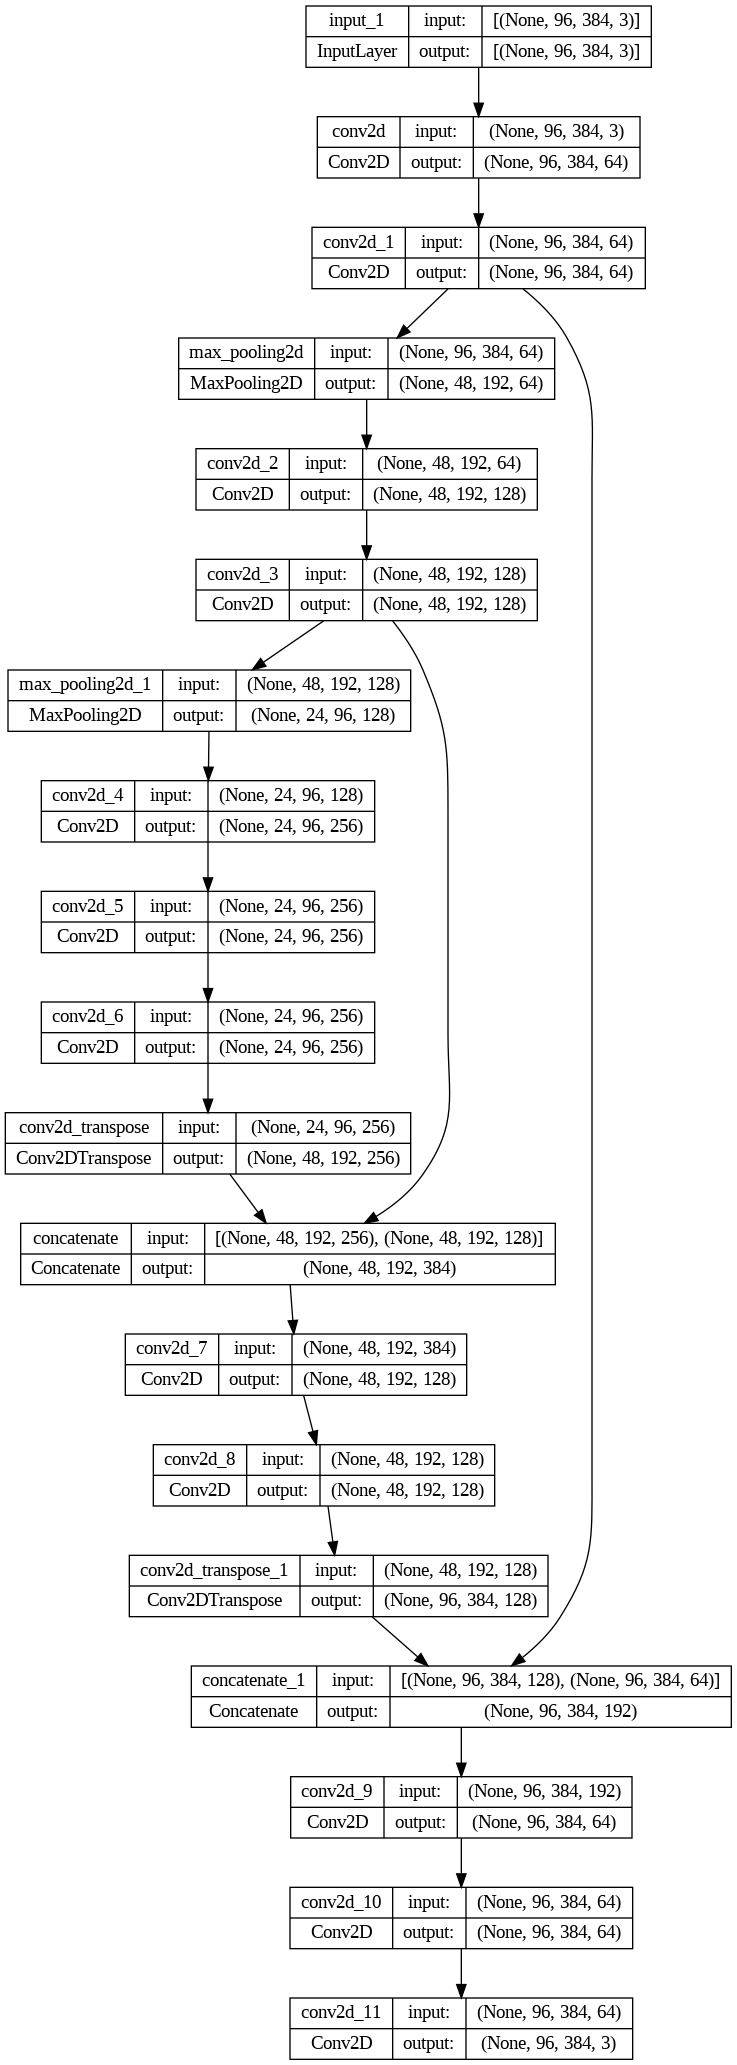

In [ ]:
inputs = keras.Input(shape=(96, 384, 3))
conv1 = keras.layers.Conv2D(64, 3, activation='relu', padding='same')(inputs)
conv1 = keras.layers.Conv2D(64, 3, activation='relu', padding='same')(conv1)
pool1 = keras.layers.MaxPooling2D()(conv1)

conv2 = keras.layers.Conv2D(128, 3, activation='relu', padding='same')(pool1)
conv2 = keras.layers.Conv2D(128, 3, activation='relu', padding='same')(conv2)
pool2 = keras.layers.MaxPooling2D()(conv2)

conv3 = keras.layers.Conv2D(256, 3, activation='relu', padding='same')(pool2)
conv3 = keras.layers.Conv2D(256, 3, activation='relu', padding='same')(conv3)
conv3 = keras.layers.Conv2D(256, 3, activation='relu', padding='same')(conv3)
pool3 = keras.layers.MaxPooling2D()(conv3)

# Decoder layers
conv4 = keras.layers.Conv2DTranspose(256, 3, strides=2, activation='relu', padding='same')(conv3)
conv4 = keras.layers.Concatenate()([conv4, conv2])
conv4 = keras.layers.Conv2D(128, 3, activation='relu', padding='same')(conv4)
conv4 = keras.layers.Conv2D(128, 3, activation='relu', padding='same')(conv4)

conv5 = keras.layers.Conv2DTranspose(128, 3, strides=2, activation='relu', padding='same')(conv4)
conv5 = keras.layers.Concatenate()([conv5, conv1])
conv5 = keras.layers.Conv2D(64, 3, activation='relu', padding='same')(conv5)
conv5 = keras.layers.Conv2D(64, 3, activation='relu', padding='same')(conv5)

#conv6 = keras.layers.Conv2DTranspose(64, 3, strides=2, activation='relu', padding='same')(conv5)
conv6 = keras.layers.Conv2D(3, 3, activation='sigmoid', padding='same')(conv5)

# Create the model
model = keras.Model(inputs=inputs, outputs=conv6)
tf.keras.utils.plot_model(model,to_file="FCN_architecture.png",show_shapes=True,show_dtype=False,show_layer_names=True,rankdir="TB",expand_nested=False,dpi=96,layer_range=None,show_layer_activations=False,)

In [ ]:
model.save_weights('C:/Users/kamal/Downloads/NNDL_project_models/FCN_8__with_skip_weights.h5')
model.save('C:/Users/kamal/Downloads/NNDL_project_models/FCN_8_with_skip.h5')

1/1 [==============================] - 1s 886ms/step


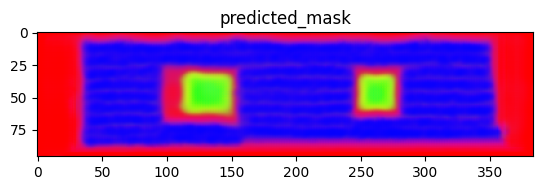

In [ ]:
import os
import cv2
import numpy as np
import tensorflow as tf
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt

def normalize_data(data):
    return data / 255.0

# Path to the image file
#image_file = "D:\AMRITA\ML pjct\palm_mask\image\MaI14_337.jpg.png"
image_file = "/content/MaI14_057.jpg"
model_path = "/content/drive/MyDrive/NNDL_models_5/FCN_8_with_skip.h5"

model = tf.keras.models.load_model(model_path)

# Read the image
image = cv2.imread(image_file)
new_size = (384, 96)
image_resized = cv2.resize(image, new_size)
    #mask_resized = cv2.resize(mask, new_size)
# Normalize the image
normalized_image = normalize_data(image_resized)

# Convert the image to numpy array
normalized_image = np.array([normalized_image])

# Create a TensorFlow tensor from the normalized image
image_tensor = tf.convert_to_tensor(normalized_image)

# Perform prediction using the trained model
predicted_mask = model.predict(image_tensor)

# Perform any post-processing or analysis based on the predicted mask
# ...

# Display the layout segmentation mask
plt.title("predicted_mask")
plt.imshow(predicted_mask[0])
plt.show

tf.keras.preprocessing.image.save_img(f'predicted_fcn8.png', predicted_mask[0])

In [ ]:
import cv2

# Load the image and mask
image = image_resized
mask = predicted_mask[0]

# Check if the images are loaded correctly
if image is None:
    print("Error loading the input image.")
else:
    # Resize the mask to match the dimensions of the image
    mask = cv2.resize(mask, (image.shape[1], image.shape[0]))

    # Perform bitwise AND operation
    bitwise_and = cv2.bitwise_and(image, image, mask=mask)

    # Perform bitwise OR operation
    bitwise_or = cv2.bitwise_or(image, image, mask=mask)

    # Perform bitwise XOR operation
    bitwise_xor = cv2.bitwise_xor(image, image, mask=mask)

    # Display the results
    cv2.imshow("Bitwise AND", bitwise_and)
    cv2.imshow("Bitwise OR", bitwise_or)
    cv2.imshow("Bitwise XOR", bitwise_xor)
    cv2.waitKey(0)
    cv2.destroyAllWindows()


error: ignored

In [ ]:
predicted_mask=cv2.resize(predicted_mask[0],new_size)
print(predicted_mask.shape)
print(image_resized.shape)

(96, 384)
(96, 384, 3)


1/1 [==============================] - 2s 2s/step


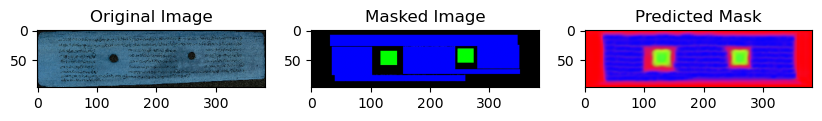

In [ ]:
import matplotlib.pyplot as plt

# Load the original image
original_image = test_images[2]

# Create a masked version of the original image
masked_image = test_masks[2]

# Create a predicted mask for the original image
image=test_images[1]
new_size = (384, 96)
image_resized = cv2.resize(image, new_size)
normalized_image = np.array([image_resized])
image_tensor = tf.convert_to_tensor(normalized_image)
predicted_mask = model.predict(image_tensor)

# Display the original image, masked image and predicted mask
plt.figure(figsize=(10, 40))
plt.subplot(1, 3, 1)
plt.imshow(original_image)
plt.title("Original Image")

plt.subplot(1, 3, 2)
plt.imshow(masked_image)
plt.title("Masked Image")

plt.subplot(1, 3, 3)
plt.imshow(predicted_mask[0])
plt.title("Predicted Mask")

plt.show()



In [ ]:
import numpy as np
from sklearn.metrics import precision_recall_curve, average_precision_score

#model_path = '/content/drive/MyDrive/NNDL_models/FCN_16.h5'
#model = tf.keras.models.load_model(model_path)
predicted_masks = model.predict(test_images)


threshold = 0.5
binary_masks = (predicted_masks > threshold).astype(int)
binary_true_masks = (test_masks > threshold).astype(int)  # Convert ground truth masks as well


def compute_iou(y_true, y_pred):
    intersection = np.sum(y_true * y_pred)
    union = np.sum(np.clip(y_true + y_pred, 0, 1))
    iou = intersection / (union + 1e-7)  # Add a small value to avoid division by zero
    return iou

iou_scores = []
for i in range(len(test_images)):
    iou = compute_iou(binary_true_masks[i], binary_masks[i])
    iou_scores.append(iou)


ap_scores = []
for class_id in range(3):  # Assuming you have 3 classes
    y_true = binary_true_masks[..., class_id].flatten()
    y_pred = binary_masks[..., class_id].flatten()


    if np.sum(y_true) == 0:
        continue

    precision, recall, _ = precision_recall_curve(y_true, y_pred)
    ap = average_precision_score(y_true, y_pred)
    ap_scores.append(ap)


mAP = np.mean(ap_scores)
print("mAP@IoU:",mAP)

2/2 [==============================] - 69s 21s/step
mAP@IoU: 0.7972097203966837


In [ ]:
import numpy as np
from sklearn.metrics import classification_report

# Assuming you have the test data: test_images and test_labels

# Predict the labels for the test images
predicted_labels = model.predict(test_images)

# Convert the predicted probabilities to class labels
predicted_labels = np.argmax(predicted_labels, axis=-1)

# Flatten the ground truth and predicted labels
test_labels_flat = test_labels.flatten()
predicted_labels_flat = predicted_labels.flatten()

# Calculate evaluation metrics
classification_report = classification_report(test_labels_flat, predicted_labels_flat)

print("Classification Report:\n", classification_report)

2/2 [==============================] - 62s 19s/step
Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.91      0.91    652627
           1       0.89      0.78      0.83     66927
           2       0.94      0.95      0.95    939326

    accuracy                           0.93   1658880
   macro avg       0.91      0.88      0.90   1658880
weighted avg       0.93      0.93      0.93   1658880



In [ ]:
import cv2
import numpy as np

# Assuming you have the original image and predicted image stored as "original_image" and "predicted_image"
# Also, assuming you have the mask stored as "mask"
image_file = "/content/MaI14_057.jpg"
original_image = cv2.imread(image_file)
new_size=(384,96)
original_image=cv2.resize(original_image,new_size)
# Reshape the mask to have 3 channels
mask_3ch = predicted_mask[0]



# Perform bitwise OR operation
bitwise_or = cv2.bitwise_or(original_image, mask_3ch)



# Display the results
cv2.imshow("Bitwise OR", bitwise_or)
cv2.waitKey(0)
cv2.destroyAllWindows()


error: ignored

In [ ]:
print(mask_3ch.shape)

(96, 384, 3)


In [ ]:
print(original_image.shape)

(96, 384, 3)
